In [1]:
import numpy as np
import imageio as im
from os import listdir
from os.path import isfile, join
import re

import imageio
from PIL import Image, ImageDraw, ImageFilter

import matplotlib
import matplotlib.pyplot as plt

In [298]:
envs=[
    "AirRaidNoFrameskip-v4"
    ,"CarnivalNoFrameskip-v4"
    ,"DemonAttackNoFrameskip-v4"
    ,"NameThisGameNoFrameskip-v4"
    ,"PongNoFrameskip-v4"
    ,"SpaceInvadersNoFrameskip-v4"
]
models=[
    "AirRaid"
    , "Carnival"
    , "DemonAttack"
    , "NameThisGame"
    , "Pong"
    , "SpaceInvaders"
    , "MultiTask"
    , "MultiTaskPopart"
]

In [299]:
for model in models:
    path = "../logs/torchbeast/" + model + "/movies/play_raw/"
    filenames = [f for f in listdir(path) if isfile(join(path, f))]
    filenames = np.sort(filenames)
    filenames = filenames[filenames != ".DS_Store"]
    
    for env in envs:
        regex = re.compile(".*" + env + ".*")
        mfilenames = [string for string in filenames if re.match(regex, string)]
        if len(mfilenames) > 0:
            moviefilename = path.replace("play_raw/", "") + mfilenames[0].replace("_00000.png", ".gif")
            with imageio.get_writer(moviefilename, mode='I', duration = 0.05) as writer:
                for filename in mfilenames:
                    image = imageio.imread(path + filename)
                    writer.append_data(image)

In [301]:
path = "../logs/torchbeast/actions/"
filenames = [f for f in listdir(path) if isfile(join(path, f))]
filenames = np.sort(filenames)
filenames = filenames[filenames != ".DS_Store"]
actions = []
for filename in filenames:
    actions.append(sum(1 for line in open(path + filename)))

for model in models:
    path = "../logs/torchbeast/" + model + "/movies/saliency_raw/"
    filenames = [f for f in listdir(path) if isfile(join(path, f))]
    filenames = np.sort(filenames)
    filenames = filenames[filenames != ".DS_Store"]
    
    for i in range(len(envs)):
        env = envs[i]
        regex = re.compile("Saliency_.*" + env + ".*")
        mfilenames = [string for string in filenames if re.match(regex, string)]
        if len(mfilenames) > 0:
            print(model, env, len(mfilenames) / actions[i] * 100.)

AirRaid AirRaidNoFrameskip-v4 6.402199528672427
Carnival CarnivalNoFrameskip-v4 47.61904761904761
DemonAttack DemonAttackNoFrameskip-v4 3.186856690419636
NameThisGame NameThisGameNoFrameskip-v4 3.248794801928317
Pong PongNoFrameskip-v4 7.152317880794702
SpaceInvaders SpaceInvadersNoFrameskip-v4 5.2973342447026655
MultiTask AirRaidNoFrameskip-v4 6.3629222309505105
MultiTask CarnivalNoFrameskip-v4 47.91666666666667
MultiTask DemonAttackNoFrameskip-v4 3.167062549485352
MultiTask NameThisGameNoFrameskip-v4 3.227834835464263
MultiTask PongNoFrameskip-v4 7.152317880794702
MultiTask SpaceInvadersNoFrameskip-v4 5.2973342447026655
MultiTaskPopart AirRaidNoFrameskip-v4 6.402199528672427
MultiTaskPopart CarnivalNoFrameskip-v4 48.51190476190476
MultiTaskPopart DemonAttackNoFrameskip-v4 3.167062549485352
MultiTaskPopart NameThisGameNoFrameskip-v4 3.248794801928317
MultiTaskPopart PongNoFrameskip-v4 7.196467991169977
MultiTaskPopart SpaceInvadersNoFrameskip-v4 5.2973342447026655


MultiTaskPopart


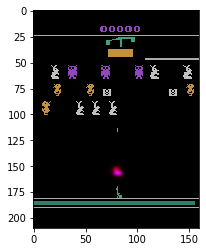

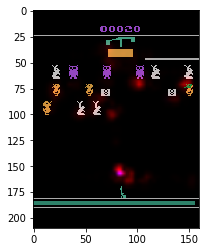

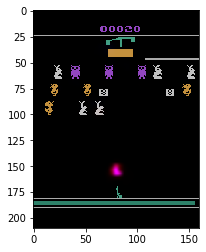

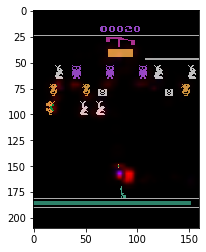

In [296]:
for model in models[-1:]:
    print(model)
    path = "../logs/torchbeast/" + model + "/movies/saliency_raw/"
    filenames = [f for f in listdir(path) if isfile(join(path, f))]
    filenames = np.sort(filenames)
    filenames = filenames[filenames != ".DS_Store"]
    
    for env in envs[1:2]:
        regex = re.compile("Saliency_.*" + env + ".*")
        mfilenames = [string for string in filenames if re.match(regex, string)]
        if len(mfilenames) > 0:

            moviefilename = "./Saliency_" + env + ".gif"
            with imageio.get_writer(moviefilename, mode='I', duration = 0.05) as writer:                            

                for filename in mfilenames[0:4]:
                    atari = Image.open(path + filename.replace("Saliency", "Atari"))
                    saliency = Image.open(path + filename)
                    saliency = np.array(saliency)
                    #saliency[:, :, 2] = saliency[:, :, 1]
                    #saliency[:, :, 1] = 0
                    atari = np.array(atari) + np.array(saliency)
                    plt.imshow(atari)
                    plt.show()
                    writer.append_data(np.array(atari))                       

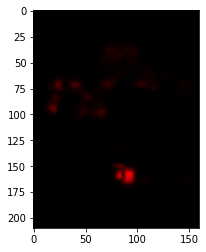

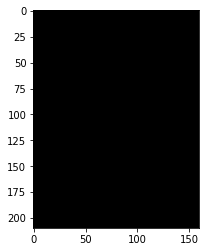

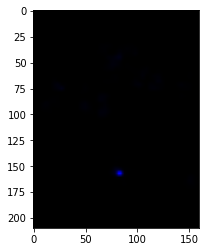

In [297]:
for i in range(3):
    data = np.zeros_like(saliency)
    data[:, :, i] = saliency[:, :, i]
    plt.imshow(data)
    plt.show()

In [317]:
flatten = lambda l: [item for sublist in l for item in sublist]
allfilenames = []
for model in models:
    path = "../logs/torchbeast/" + model + "/movies/saliency_raw/"
    filenames = [path + f for f in listdir(path) if isfile(join(path, f))]
    filenames = np.sort(filenames)
    filenames = filenames[filenames != ".DS_Store"]
    allfilenames.append(filenames)
allfilenames = flatten(allfilenames)

for env in envs:

    moviefilename = "./Saliency_" + env + ".gif"
    with imageio.get_writer(moviefilename, mode='I', duration = 0.05) as writer:

        filenames = []
        regex = re.compile(".*/" + env.replace("NoFrameskip-v4", "") + "/.*/Saliency_.*" + env + ".*")
        filenames.append([string for string in allfilenames if re.match(regex, string)])
        regex = re.compile(".*/MultiTask/.*/Saliency_.*" + env + ".*")
        filenames.append([string for string in allfilenames if re.match(regex, string)])
        regex = re.compile(".*/MultiTaskPopart/.*/Saliency_.*" + env + ".*")
        filenames.append([string for string in allfilenames if re.match(regex, string)])
        
        title = ["Single-task", "Multi-task", "Multi-task Popart"]
        n = len(filenames)
        for i in range(min(len(filenames[0]), len(filenames[1]), len(filenames[2]))):
            
            fig, axes = plt.subplots(1, n+1, figsize=(10,4))
            for j in range(n):
                filename = filenames[j][i]
                atari = Image.open(filename.replace("Saliency", "Atari"))
                atari_orig = atari.copy()

                saliency = Image.open(filename)
                saliency.putalpha(100)
                atari.paste(saliency, (0,0), saliency)

                axes[j+1].imshow(atari)
                axes[j+1].title.set_text(title[j])
                axes[j+1].set_axis_off()    

            axes[0].imshow(atari_orig)
            axes[0].title.set_text(env.replace("NoFrameskip-v4", ""))
            axes[0].set_axis_off()    
        
            fig.savefig("./temp.png")
            plt.close(fig)
            image = imageio.imread("./temp.png")
            writer.append_data(image)     

0 2546
1 2546
2 2169
0 336
1 336
2 336
0 3219
1 3234
2 2140
0 3122
1 3115
2 2074
0 2265
1 2265
2 2152
0 2926
1 2926
2 2107
